In [27]:
import pandas as pd
from cleaning import ingest_data
from cleaning import get_sheet_data
from cleaning import SHEET_NAMES
from cleaning import clean
import matplotlib.pyplot as plt

plt.style.use('seaborn')
%matplotlib inline

In [3]:
dict_data = ingest_data(r'C:\Users\USER\Documents\Project_setup\Food_Pricing_Prediction\data\SELECTED FOOD (JAN_2019 - NOV 2021).csv', SHEET_NAMES)

In [4]:
dollar_price = pd.read_excel(r'C:\Users\USER\Documents\Project_setup\Food_Pricing_Prediction\data\Dollar_Prices.xlsx')

In [5]:
dollar_price['Date'] = pd.to_datetime(dollar_price['Date'])

In [6]:
SHEET_NAMES.remove('NATIONAL')

In [7]:
print(SHEET_NAMES)

['ABIA', 'ABUJA', 'ANAMBRA', 'EBONYI', 'ENUGU', 'IMO', 'AKWA IBOM', 'BAYELSA', 'CROSS RIVER', 'DELTA', 'RIVERS', 'EDO', 'ADAMAWA', 'BAUCHI', 'BORNO', 'GOMBE', 'BENUE', 'TARABA', 'YOBE', 'KOGI', 'KWARA', 'NASSARAWA', 'NIGER', 'PLATEAU', 'EKITI', 'LAGOS', 'ONDO', 'OGUN_', 'OSUN', 'OYO', 'JIGAWA_', 'KADUNA_', 'KANO_', 'KATSINA', 'KEBBI_', 'ZAMFARA_', 'SOKOTO']


In [8]:
states =['ABIA', 'ABUJA', 'ANAMBRA', 'EBONYI', 'ENUGU', 'IMO', 'AKWA IBOM', 'BAYELSA',
         'CROSS RIVER', 'DELTA', 'RIVERS', 'EDO', 'ADAMAWA', 'BAUCHI', 'BORNO', 'GOMBE', 'BENUE', 'TARABA',
         'YOBE', 'KOGI', 'KWARA', 'NASSARAWA', 'NIGER', 'PLATEAU', 'EKITI', 'LAGOS', 'ONDO', 
         'OGUN', 'OSUN', 'OYO', 'JIGAWA', 'KADUNA', 'KANO', 'KATSINA', 'KEBBI', 'ZAMFARA', 'SOKOTO']

In [11]:
def get_data(dict_data, state_list):
    # get data sheet
    df = [get_sheet_data(dict_data, state) for state in SHEET_NAMES]
    # clean data
    df = [clean(state) for state in df]
    # reset index and rename to 'Date'
    for state in df:
        state.index =  pd.to_datetime(state.index)
        state.reset_index(inplace= True)
        state.rename(columns={'index':'Date'}, inplace= True)
    # melt data to 3 columns, 'Date', 'Food_items', and 'Food_prices'
    df = [state.melt(id_vars=['Date'], var_name="Food_items", value_name="Food_prices") for state in df]
    # add state location column for each dataframe in df
    for index, df_ in enumerate(df):
        for state in state_list:
            if index == state_list.index(state):
                df[index]['Location'] = state
    # concatenate dataframes in df
    df = pd.concat(df)
    # merge with the dollar_rate dataframe
    df = pd.merge(df, dollar_price, left_on= 'Date', right_on= 'Date')

    return df
            

In [12]:
df = get_data(dict_data, states)
print(df.shape)
df.head()

(55599, 5)


,Date,Food_items,Food_prices,Location,Dollar Rate
0,2019-01-01,Agric eggs medium size1 Dozen,482.5,ABIA,363.3959
1,2019-01-01,Agric eggs medium size (1)1 Piece,46.35621,ABIA,363.3959
2,2019-01-01,"Beans brown,sold loose1 KG",489.583333,ABIA,363.3959
3,2019-01-01,Beans:white black eye. sold loose1 KG,482.77027,ABIA,363.3959
4,2019-01-01,Beef Bone in1 KG,987.675156,ABIA,363.3959


In [14]:
df.isnull().sum()

Date           0
Food_items     0
Food_prices    1
Location       0
Dollar Rate    0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
df.dtypes

Date           datetime64[ns]
Food_items             object
Food_prices            object
Location               object
Dollar Rate           float64
dtype: object

In [18]:
def fix(x):
    try:
        value=float(x)
    except:
        try:
            number=x.split(' ')
            value= number[0]+'.'+number[1]
            value= float(value)
        except:
            value=0
    return value

In [19]:
df['Food_prices'] = df['Food_prices'].apply(fix)

In [20]:
df.dtypes

Date           datetime64[ns]
Food_items             object
Food_prices           float64
Location               object
Dollar Rate           float64
dtype: object

In [47]:
df = df.loc[df['Food_prices'] != 0]

In [48]:
df.shape

(55595, 5)

# Insights
- The top 10 expensive food item in the dataframe?
- The least 10 expensive food item?
- Location of the most and least expensive food item?
- Time series trend of the most and least expensive food item
- Time series trend of the dollar rates 
- Is the food item trend similar?
- Which food item had a rapid incraese or decrease in price?


In [94]:
# Least 10 Expensive Food Items
least_10 = df.sort_values(by="Food_prices", ascending=True).head(10)
least_10

,Date,Food_items,Food_prices,Location,Dollar Rate
9762,2019-07-01,Agric eggs(medium size price of one)1 Piece,31.052632,IMO,360.4107
9891,2019-07-01,Agric eggs(medium size price of one)1 Piece,31.250000,CROSS RIVER,360.4107
9848,2019-07-01,Agric eggs(medium size price of one)1 Piece,31.875000,BAYELSA,360.4107
9676,2019-07-01,Agric eggs(medium size price of one)1 Piece,34.285714,EBONYI,360.4107
9934,2019-07-01,Agric eggs(medium size price of one)1 Piece,35.000000,DELTA,360.4107
24468,2020-04-01,Agric eggs(medium size price of one)1 Piece,35.153846,GOMBE,385.2101
22877,2020-03-01,Agric eggs(medium size price of one)1 Piece,35.153846,GOMBE,370.7935
4430,2019-03-01,Agric eggs(medium size price of one)1 Piece,35.277778,OYO,360.1223
9805,2019-07-01,Agric eggs(medium size price of one)1 Piece,35.428571,AKWA IBOM,360.4107
25457,2020-05-01,Agric eggs(medium size price of one)1 Piece,35.631750,ABUJA,389.1090


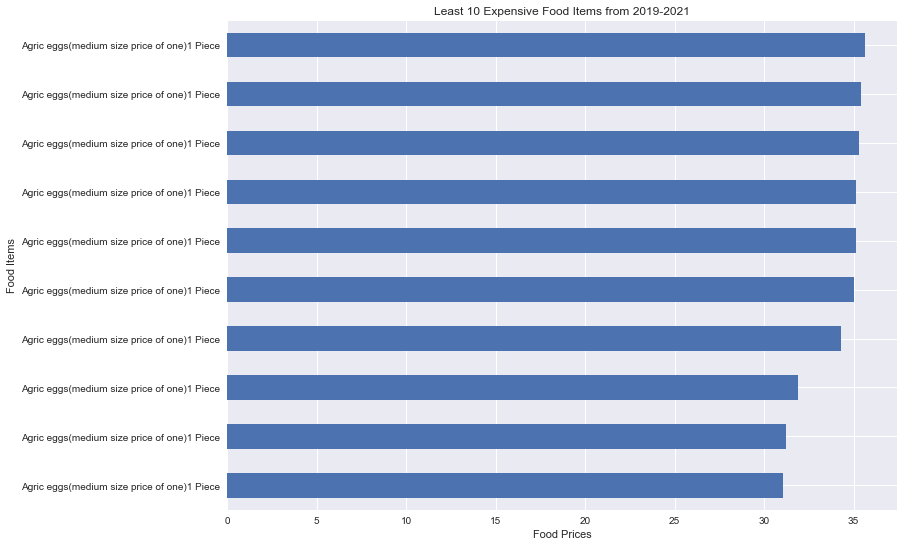

In [59]:
least_10.plot(x="Food_items", y="Food_prices", kind='barh', legend=False)
plt.ylabel('Food Items')
plt.xlabel('Food Prices')
plt.title('Least 10 Expensive Food Items from 2019-2021')
plt.gcf().set_size_inches(12, 9);

The least expensive food item from 2019-2021 according to the dataset is "Agric eggs(medium size price of one)1 Piece" with varying prices in different locations but cheapest in IMO State costing ₦31.05k and the time it was sold at the price was 2019-07-01

I don't know if you are curious but I am, Let's get to know the price of "Agric eggs(medium size price of one)1 Piece" as at the most recent time in the dataset which is 2021-11-01

In [75]:
mask = (df['Location'] == 'IMO') & (df['Food_items'] == "Agric eggs(medium size price of one)1 Piece")
Imo_eggPrice = df[mask].set_index('Date')
Imo_eggPrice.head()

,Food_items,Food_prices,Location,Dollar Rate
Date,,,,
2019-01-01,Agric eggs(medium size price of one)1 Piece,50.000000,IMO,363.3959
2019-02-01,Agric eggs(medium size price of one)1 Piece,48.529412,IMO,361.4763
2019-03-01,Agric eggs(medium size price of one)1 Piece,47.717949,IMO,360.1223
2019-04-01,Agric eggs(medium size price of one)1 Piece,48.743590,IMO,360.0954
2019-05-01,Agric eggs(medium size price of one)1 Piece,50.444444,IMO,360.2111


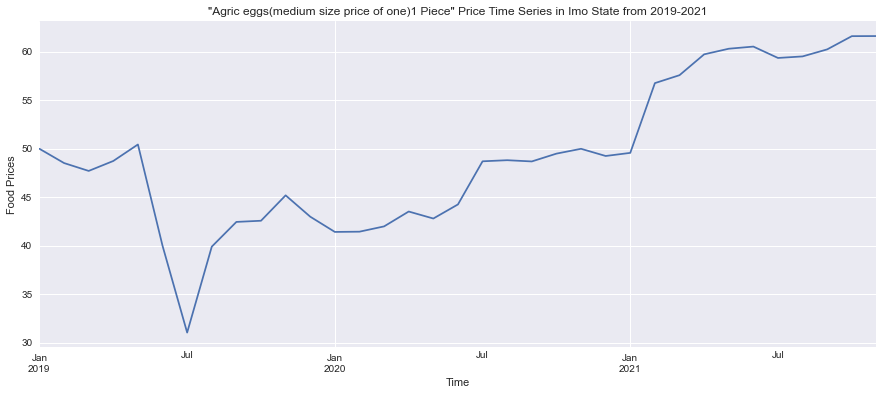

In [81]:
fig, ax = plt.subplots(figsize=(15, 6))
Imo_eggPrice["Food_prices"].plot( label="Agric eggs(medium size price of one)1 Piece" ,ax=ax)
plt.xlabel('Time')
plt.ylabel('Food Prices in Naria')
plt.title('"Agric eggs(medium size price of one)1 Piece" Price Time Series in Imo State from 2019-2021');

In Imo state, as at 2021-11-01, "Agric eggs(medium size price of one)1 Piece" has double the price it was in 2019-07-01. But another thing to denote from the above visualization is sharp decrease in the price of "Agric eggs(medium size price of one)1 Piece" in July 2019, It would be interesing to know the cause of that, maybe a large poultry in the state reached its peak in production then influenced the price eggs were sold or the prices of poultry feed decreases, unfortunately, we can't investigate that further with this dataset but we can check if the same trend exist in other states; Lets choose another state from the North and another one from the South-West, remember this dataset is local to Nigeria. So my choice is Kano and Oyo state

In [82]:
mask = (df['Location'] == 'KANO') & (df['Food_items'] == "Agric eggs(medium size price of one)1 Piece")
Kano_eggPrice = df[mask].set_index('Date')
mask = (df['Location'] == 'OYO') & (df['Food_items'] == "Agric eggs(medium size price of one)1 Piece")
Oyo_eggPrice = df[mask].set_index('Date')

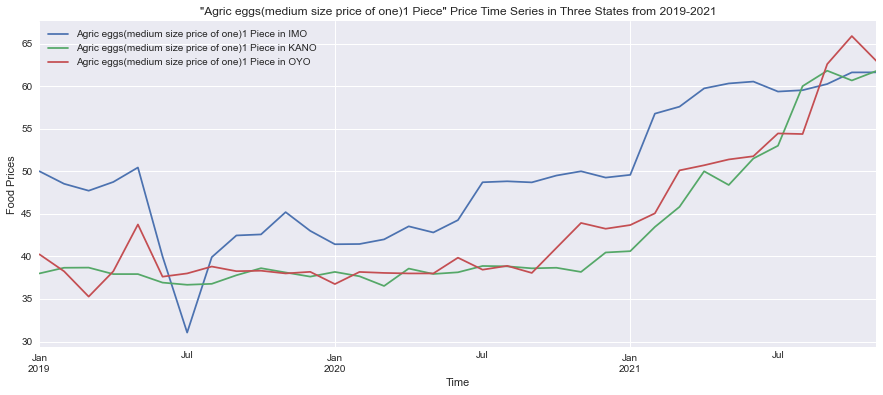

In [84]:
fig, ax = plt.subplots(figsize=(15, 6))
Imo_eggPrice["Food_prices"].plot( label="Agric eggs(medium size price of one)1 Piece in IMO" ,ax=ax)
Kano_eggPrice["Food_prices"].plot( label="Agric eggs(medium size price of one)1 Piece in KANO" ,ax=ax)
Oyo_eggPrice["Food_prices"].plot( label="Agric eggs(medium size price of one)1 Piece in OYO" ,ax=ax)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Food Prices')
plt.title('"Agric eggs(medium size price of one)1 Piece" Price Time Series in Three States from 2019-2021');

The Trend is almost similar, steady increase as time passed but, the sharp decrease in JUly 2019 is seen as peculiar only to IMO State

In [93]:
# Top 10 Expensive items
top_10 = df.sort_values(by="Food_prices", ascending=False).head(10)
top_10

,Date,Food_items,Food_prices,Location,Dollar Rate
4571,2019-03-01,Frozen chicken1 Unit,11400.000000,KANO,360.1223
54083,2021-11-01,Catfish :dried1 KG,3553.532182,ABUJA,410.9593
50901,2021-09-01,Catfish :dried1 KG,3395.604396,ABUJA,411.5591
52492,2021-10-01,Catfish :dried1 KG,3366.227106,ABUJA,411.1189
49310,2021-08-01,Catfish :dried1 KG,3302.985348,ABUJA,411.5751
16912,2019-11-01,Frozen chicken1 Unit,3236.666667,PLATEAU,362.2037
18460,2019-12-01,Frozen chicken1 Unit,3220.000000,PLATEAU,362.6053
47719,2021-07-01,Catfish :dried1 KG,3210.863422,ABUJA,411.1732
54064,2021-11-01,Frozen chicken1 Unit,3200.000000,ABUJA,410.9593
20051,2020-01-01,Frozen chicken1 Unit,3180.450000,PLATEAU,362.2622


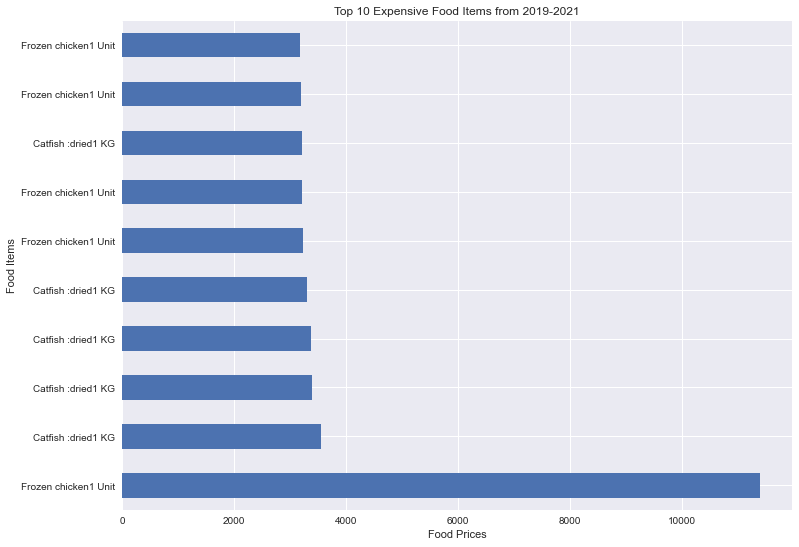

In [92]:
top_10.plot(x="Food_items", y="Food_prices", kind='barh', legend=False)
plt.ylabel('Food Items')
plt.xlabel('Food Prices')
plt.title('Top 10 Expensive Food Items from 2019-2021')
plt.gcf().set_size_inches(12, 9);

The Most Expensive Food Item in the dataset is "Frozen chicken1 Unit" that was sold at ₦11400.00k in KANO State in 2019-03-01. 
Let's check how much this Food Item costs as at the most recent time in our dataset and compare the trend with other Locations, My choices for other Locations to correlate with are LAGOS State and RIVERS State

In [95]:
mask = (df['Location'] == 'KANO') & (df['Food_items'] == "Frozen chicken1 Unit")
Kano_chickenPrice = df[mask].set_index('Date')
mask = (df['Location'] == 'LAGOS') & (df['Food_items'] == "Frozen chicken1 Unit")
Lagos_chickenPrice = df[mask].set_index('Date')
mask = (df['Location'] == 'RIVERS') & (df['Food_items'] == "Frozen chicken1 Unit")
Rivers_chickenPrice = df[mask].set_index('Date')

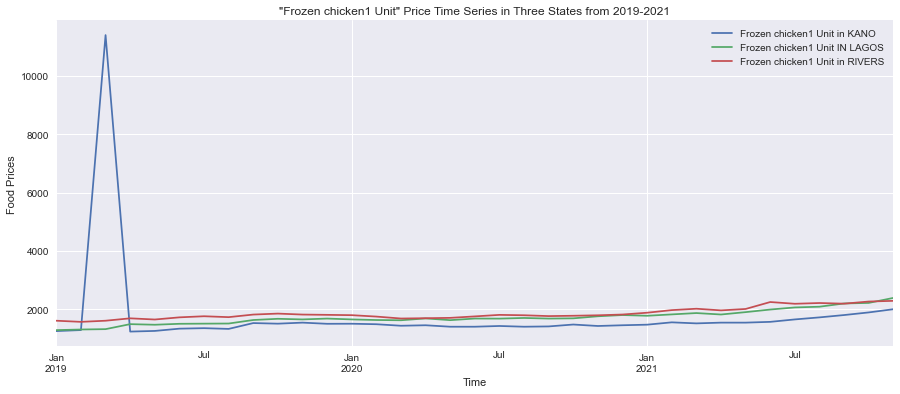

In [98]:
fig, ax = plt.subplots(figsize=(15, 6))
Kano_chickenPrice["Food_prices"].plot( label="Frozen chicken1 Unit in KANO" ,ax=ax)
Lagos_chickenPrice["Food_prices"].plot( label="Frozen chicken1 Unit IN LAGOS" ,ax=ax)
Rivers_chickenPrice["Food_prices"].plot( label="Frozen chicken1 Unit in RIVERS" ,ax=ax)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Food Prices')
plt.title('"Frozen chicken1 Unit" Price Time Series in Three States from 2019-2021');

Obviously, that Price must be an outlier that we would have to address before modelling, Let's Visualize again excluding KANO state

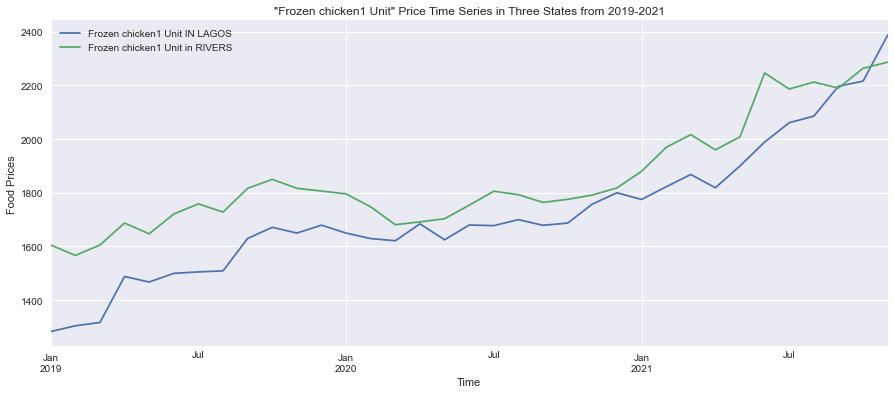

In [99]:
fig, ax = plt.subplots(figsize=(15, 6))
Lagos_chickenPrice["Food_prices"].plot( label="Frozen chicken1 Unit IN LAGOS" ,ax=ax)
Rivers_chickenPrice["Food_prices"].plot( label="Frozen chicken1 Unit in RIVERS" ,ax=ax)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Food Prices')
plt.title('"Frozen chicken1 Unit" Price Time Series in Three States from 2019-2021');

Now, this makes more sense, The Price of "Frozen chicken1 Unit" has also increased steadily with a little up and down trend since 2019, This should be same with other Food Items too.

Before now, we've visulaised the the top 10 and least 10 expensive Food Items but we saw repetitions of some Food Items, Now Let's check for Top 10 and Least 10 unique food Items and how expensive they are.

In [111]:
df.replace(to_replace=11400.000000, value= 1140, inplace=True)

In [112]:
top_10_unique = df.groupby('Food_items')['Food_prices'].max().sort_values(ascending=False).head(10)
top_10_unique

Food_items
Catfish :dried1 KG                3553.532182
Frozen chicken1 Unit              3236.666667
Mudfish : dried1 KG               2950.401027
Beef,boneless1 KG                 2533.333333
Dried Fish Sardine1 KG            2523.094414
Titus:frozen1 KG                  2287.404987
Catfish Smoked1 KG                2178.714286
Mackerel : frozen1 KG             2046.090034
Chicken Wings1 KG                 2023.636364
Tilapia fish (epiya) fresh1 KG    2000.557342
Name: Food_prices, dtype: float64

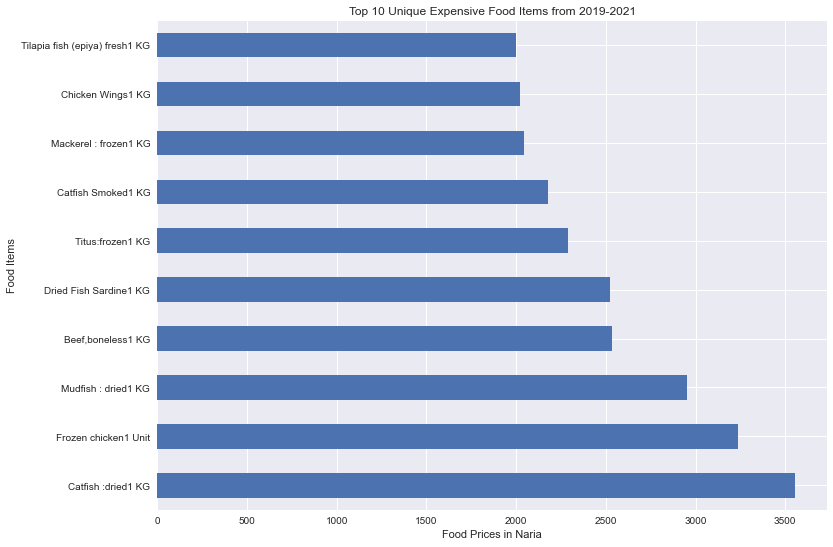

In [115]:
top_10_unique.plot( kind='barh', legend=False)
plt.ylabel('Food Items')
plt.xlabel('Food Prices in Naria')
plt.title('Top 10 Unique Expensive Food Items from 2019-2021')
plt.gcf().set_size_inches(12, 9);

After replacing the outlier, we can see that the Most Expensive Food Item across all is "Catfish :dried1 KG" and it costs ₦3553.53k in ABUJA as at 2021-11-01

In [132]:
df.sort_values(by="Food_prices", ascending=False).head(1)

,Date,Food_items,Food_prices,Location,Dollar Rate
54083,2021-11-01,Catfish :dried1 KG,3553.532182,ABUJA,410.9593


In [118]:
least_10_unique = df.groupby('Food_items')['Food_prices'].min().sort_values(ascending=True).head(10)
least_10_unique

Food_items
Agric eggs(medium size price of one)1 Piece    31.052632
Agric eggs medium size (1)1 Piece              36.366667
Sweet potato1 KG                               61.136731
Maize grain white sold loose1 KG               70.356125
Maize grain yellow sold loose1 KG              73.510738
Tomato1 KG                                     84.339080
Onion bulb1 KG                                 94.380452
Yam tuber1 KG                                  94.427119
Gari yellow,sold loose1 KG                     95.428571
Gari white,sold loose1 KG                      95.569085
Name: Food_prices, dtype: float64

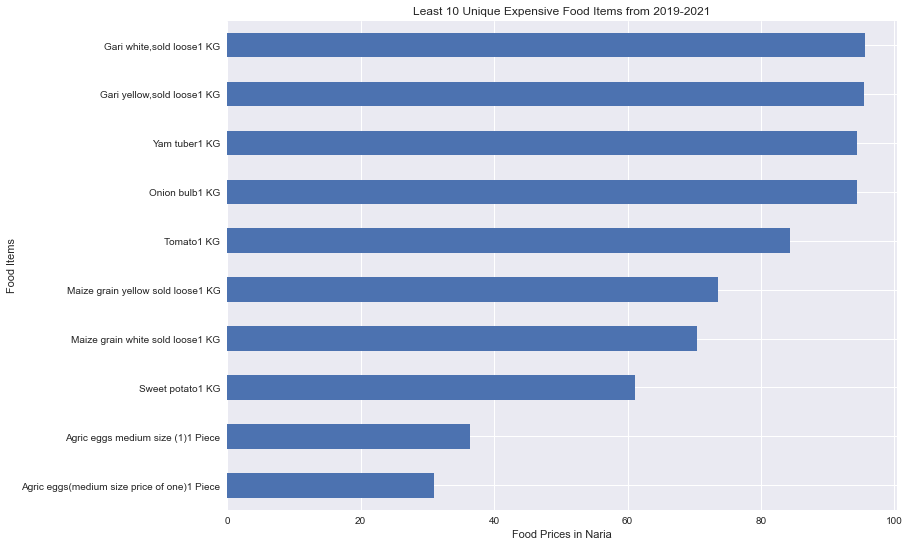

In [119]:
least_10_unique.plot( kind='barh', legend=False)
plt.ylabel('Food Items')
plt.xlabel('Food Prices in Naria')
plt.title('Least 10 Unique Expensive Food Items from 2019-2021')
plt.gcf().set_size_inches(12, 9);

It would be interesting to know the Location that has expensive Food Prices and the location that has cheap food prices. Since "Catfish :dried1 KG" is the most expensive item in the dataset and its being sold at that price in ABUJA, Let's check for the Location that sells "Catfish :dried1 KG" at the cheapest price and Let's compare Prices the Food items in both Locations

In [153]:
mask = (df['Food_items'] == "Catfish :dried1 KG") & (df['Date'] == '2021-11-01')
df[mask].sort_values(by= 'Food_prices', ascending=True).head()

,Date,Food_items,Food_prices,Location,Dollar Rate
55545,2021-11-01,Catfish :dried1 KG,1300.000000,ZAMFARA,410.9593
54771,2021-11-01,Catfish :dried1 KG,1328.021978,TARABA,410.9593
54943,2021-11-01,Catfish :dried1 KG,1340.952381,NASSARAWA,410.9593
54556,2021-11-01,Catfish :dried1 KG,1345.384615,ADAMAWA,410.9593
54857,2021-11-01,Catfish :dried1 KG,1346.666667,KOGI,410.9593


While you would get "Catfish :dried1 KG" for ₦3553.53k in ABUJA, you would get the same food Item for #1300.00k in ZAMFARA in the same Country, isn't that interesting? Let's dig more. Well, In case you don't know, I should let you know that ABUJA is Nigeria's Capital so, this is expected.

In [176]:
# Let work with the most recent time in the dataset
mask = (df['Date'] == '2021-11-01') & (df['Location'] == 'ABUJA')
abuja = df[mask].set_index('Date')
mask = (df['Date'] == '2021-11-01') & (df['Location'] == 'ZAMFARA')
zamfara = df[mask].set_index('Date')

In [194]:
abuja.head(10)

,Food_items,Food_prices,Location,Dollar Rate
Date,,,,
2021-11-01,Agric eggs medium size1 Dozen,700.261790,ABUJA,410.9593
2021-11-01,Agric eggs(medium size price of one)1 Piece,60.000000,ABUJA,410.9593
2021-11-01,"Beans brown,sold loose1 KG",702.826583,ABUJA,410.9593
2021-11-01,Beans:white black eye. sold loose1 KG,605.791934,ABUJA,410.9593
2021-11-01,Beef Bone in1 KG,1885.990260,ABUJA,410.9593
2021-11-01,"Beef,boneless1 KG",2533.333333,ABUJA,410.9593
2021-11-01,Bread sliced 500g1 Loaf,605.751380,ABUJA,410.9593
2021-11-01,Bread unsliced 500g1 Loaf,633.583420,ABUJA,410.9593
2021-11-01,Broken Rice (Ofada)1 KG,784.857143,ABUJA,410.9593


In [195]:
abuja.shape

(43, 4)

In [188]:
zamfara.head(10)

,Food_items,Food_prices,Location,Dollar Rate
Date,,,,
2021-11-01,Agric eggs medium size1 Dozen,640.000000,ZAMFARA,410.9593
2021-11-01,Agric eggs(medium size price of one)1 Piece,62.000000,ZAMFARA,410.9593
2021-11-01,"Beans brown,sold loose1 KG",464.285714,ZAMFARA,410.9593
2021-11-01,Beans:white black eye. sold loose1 KG,455.026455,ZAMFARA,410.9593
2021-11-01,Beef Bone in1 KG,1600.000000,ZAMFARA,410.9593
2021-11-01,"Beef,boneless1 KG",1900.000000,ZAMFARA,410.9593
2021-11-01,Bread sliced 500g1 Loaf,450.000000,ZAMFARA,410.9593
2021-11-01,Bread unsliced 500g1 Loaf,400.000000,ZAMFARA,410.9593
2021-11-01,Broken Rice (Ofada)1 KG,400.000000,ZAMFARA,410.9593


In [189]:
zamfara.shape

(43, 4)

In [209]:

zamfara.rename({'Food_prices': 'Food_prices_zamfara'}, axis=1, inplace=True)
zamfara.drop(columns=['Dollar Rate', 'Location'], inplace=True)
zamfara.head()

,Food_items,Food_prices_zamfara
Date,,
2021-11-01,Agric eggs medium size1 Dozen,640.000000
2021-11-01,Agric eggs(medium size price of one)1 Piece,62.000000
2021-11-01,"Beans brown,sold loose1 KG",464.285714
2021-11-01,Beans:white black eye. sold loose1 KG,455.026455
2021-11-01,Beef Bone in1 KG,1600.000000


In [211]:
zamfara.shape

(43, 2)

In [ ]:
abc = pd.concat([abuja, zm], on)

In [225]:
# Let's concatenate abuja and zamfara food prices
ab_zm = pd.merge(zamfara, abuja, left_on='Food_items', right_on='Food_items').drop(columns=['Dollar Rate', 'Location']).set_index('Food_items')
ab_zm.rename({'Food_prices': 'Food_prices_abuja'}, axis=1, inplace=True)
ab_zm.head()

,Food_prices_zamfara,Food_prices_abuja
Food_items,,
Agric eggs medium size1 Dozen,640.000000,700.261790
Agric eggs(medium size price of one)1 Piece,62.000000,60.000000
"Beans brown,sold loose1 KG",464.285714,702.826583
Beans:white black eye. sold loose1 KG,455.026455,605.791934
Beef Bone in1 KG,1600.000000,1885.990260


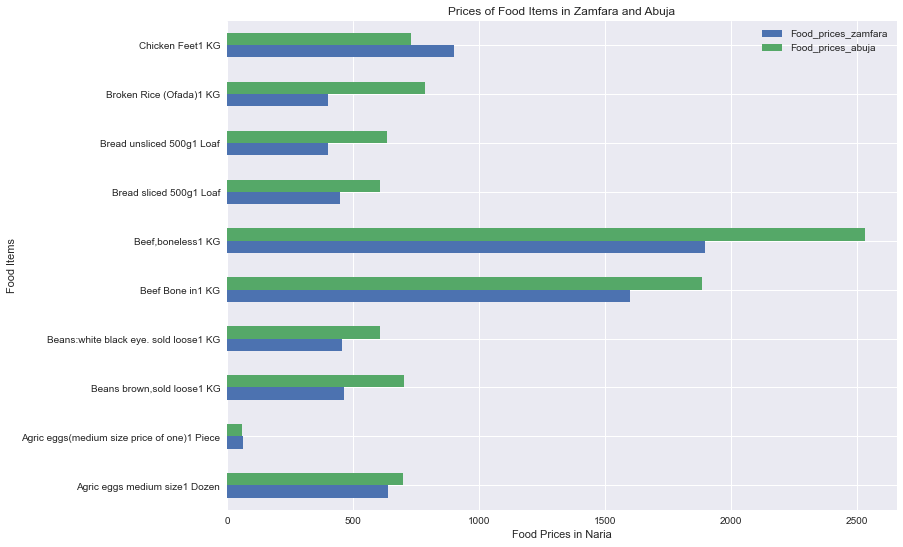

In [226]:
ab_zm.head(10).plot(kind='barh')
plt.ylabel('Food Items')
plt.xlabel('Food Prices in Naria')
plt.title('Prices of Food Items in Zamfara and Abuja')
plt.gcf().set_size_inches(12, 9);

The differences does not seem much but Food Prices in Abuja is more Expensive as seen in the barchart above. So, it is more economical to reside in Zamfara compared to Abuja in terms of Food Prices

Since the difference isn't much, Let's compare abuja again with the second state on th list: TARABA

In [227]:
mask = (df['Date'] == '2021-11-01') & (df['Location'] == 'TARABA')
taraba = df[mask]
taraba.head(10)

,Date,Food_items,Food_prices,Location,Dollar Rate
54739,2021-11-01,Agric eggs medium size1 Dozen,449.440000,TARABA,410.9593
54740,2021-11-01,Agric eggs(medium size price of one)1 Piece,41.505263,TARABA,410.9593
54741,2021-11-01,"Beans brown,sold loose1 KG",267.728938,TARABA,410.9593
54742,2021-11-01,Beans:white black eye. sold loose1 KG,353.956044,TARABA,410.9593
54743,2021-11-01,Beef Bone in1 KG,975.197812,TARABA,410.9593
54744,2021-11-01,"Beef,boneless1 KG",1303.333333,TARABA,410.9593
54745,2021-11-01,Bread sliced 500g1 Loaf,279.666667,TARABA,410.9593
54746,2021-11-01,Bread unsliced 500g1 Loaf,280.480000,TARABA,410.9593
54747,2021-11-01,Broken Rice (Ofada)1 KG,399.452991,TARABA,410.9593
54748,2021-11-01,Chicken Feet1 KG,305.210000,TARABA,410.9593


In [228]:
taraba.rename({'Food_prices': 'Food_prices_taraba'}, axis=1, inplace=True)
taraba.drop(columns=['Dollar Rate', 'Location'], inplace=True)
taraba.head()

c:\Users\USER\anaconda3\envs\insurtech\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
c:\Users\USER\anaconda3\envs\insurtech\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Date,Food_items,Food_prices_taraba
54739,2021-11-01,Agric eggs medium size1 Dozen,449.440000
54740,2021-11-01,Agric eggs(medium size price of one)1 Piece,41.505263
54741,2021-11-01,"Beans brown,sold loose1 KG",267.728938
54742,2021-11-01,Beans:white black eye. sold loose1 KG,353.956044
54743,2021-11-01,Beef Bone in1 KG,975.197812


In [229]:
taraba.shape

(43, 3)

In [233]:
# Let's concatenate abuja and taraba food prices
ab_tr = pd.merge(taraba, abuja, left_on='Food_items', right_on='Food_items').drop(columns=['Dollar Rate','Date', 'Location']).set_index('Food_items')
ab_tr.rename({'Food_prices': 'Food_prices_abuja'}, axis=1, inplace=True)
ab_tr.head()

,Food_prices_taraba,Food_prices_abuja
Food_items,,
Agric eggs medium size1 Dozen,449.440000,700.261790
Agric eggs(medium size price of one)1 Piece,41.505263,60.000000
"Beans brown,sold loose1 KG",267.728938,702.826583
Beans:white black eye. sold loose1 KG,353.956044,605.791934
Beef Bone in1 KG,975.197812,1885.990260


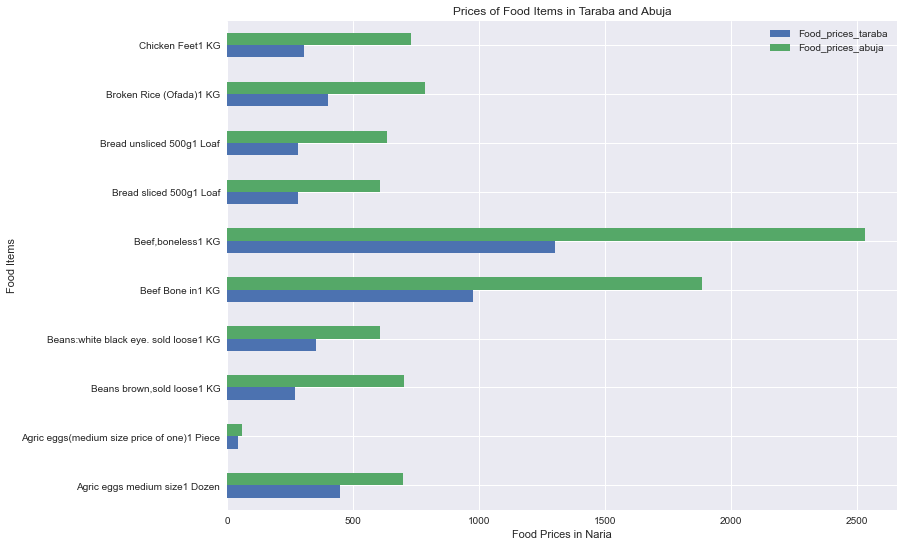

In [234]:
ab_tr.head(10).plot(kind='barh')
plt.ylabel('Food Items')
plt.xlabel('Food Prices in Naria')
plt.title('Prices of Food Items in Taraba and Abuja')
plt.gcf().set_size_inches(12, 9);

The difference is much here, Food Items in ABUJA is very expensive compared to same Food Items in TARABA, we can see "Beef boneless in1 KG" that costs more than ₦2500 in ABUJA have a price of not up to ₦1500 in TARABA. Maybe, I should just relocate to TARABA, Well, there are other factors to be considered to before taking a decision to relocate, it is not just about Food Prices but yes, the prices of Food Items is also a big Factor and this analysis has help in giving us more insight about the reality.

Lastly, let's Visualise the trend of Exchange rate of Naira to Dollar during this period. It is a relevant feature because Nigeria as a Country depend a lot on imported goods and this influences the prices of goods and services in Nigeria include Food Prices.

In [235]:
dollar_price.head()

,Dollar Rate,Date
0,363.3959,2019-01-01
1,361.4763,2019-02-01
2,360.1223,2019-03-01
3,360.0954,2019-04-01
4,360.2111,2019-05-01


In [241]:
dollar_price.set_index('Date', inplace=True)

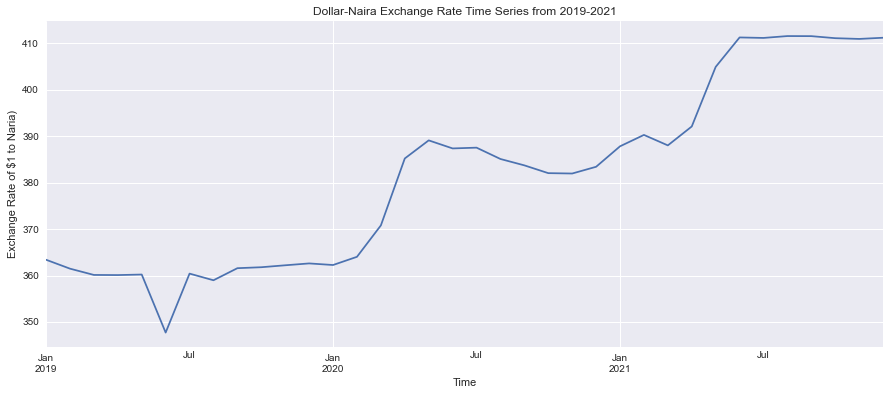

In [242]:
fig, ax = plt.subplots(figsize=(15, 6))
dollar_price["Dollar Rate"].plot(ax=ax)
plt.xlabel('Time')
plt.ylabel('Exchange Rate of $1 to Naria)')
plt.title('Dollar-Naira Exchange Rate Time Series from 2019-2021');

Well, I can see that decline in around June 2019, Maybe that was wahat influence the decrease in price of Egg in IMO State around July 2019, maybe, it is just a guess and we can't rely on this guess because the decrease in price of egg was local to Imo state. what we can see here is that the value of Naira has dropped compared to what it was in 2019 and so this should be influential in the steady increase in prices of Food Items because they show almost the same trend. Now, Let's goan predict the future